In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
data = pd.read_csv("house-prices.csv")
data.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [46]:
x = data.drop("Price", axis= 1)
y = data["Price"]

In [47]:
cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(exclude="object").columns

cat_cols, num_cols

(Index(['Brick', 'Neighborhood'], dtype='object'),
 Index(['Home', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers'], dtype='object'))

In [59]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(drop="first"), cat_cols)
    ]
)


In [60]:
model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("ridge", Ridge(alpha=1.0))
])


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [62]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  Index(['Home', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['Brick', 'Neighborhood'], dtype='object'))])),
                ('ridge', Ridge())])

In [63]:
y_pred = model.predict(X_test)

In [64]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 Score:", r2)


MSE: 92451507.03554752
R2 Score: 0.9018753741760067


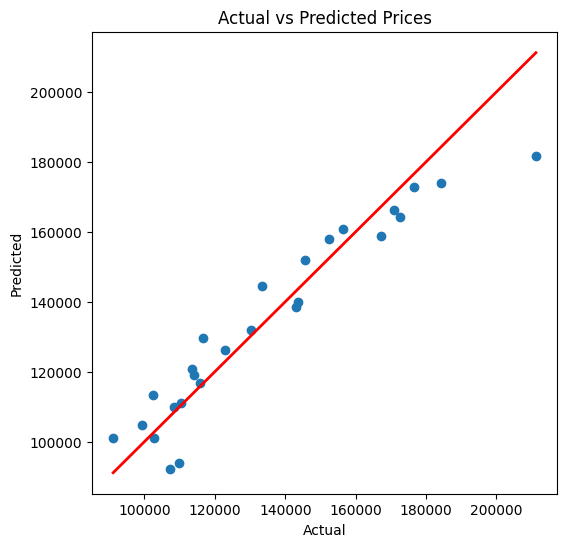

In [69]:
y_test = y_test.reset_index(drop=True)  
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=2) 
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Prices")
plt.show()


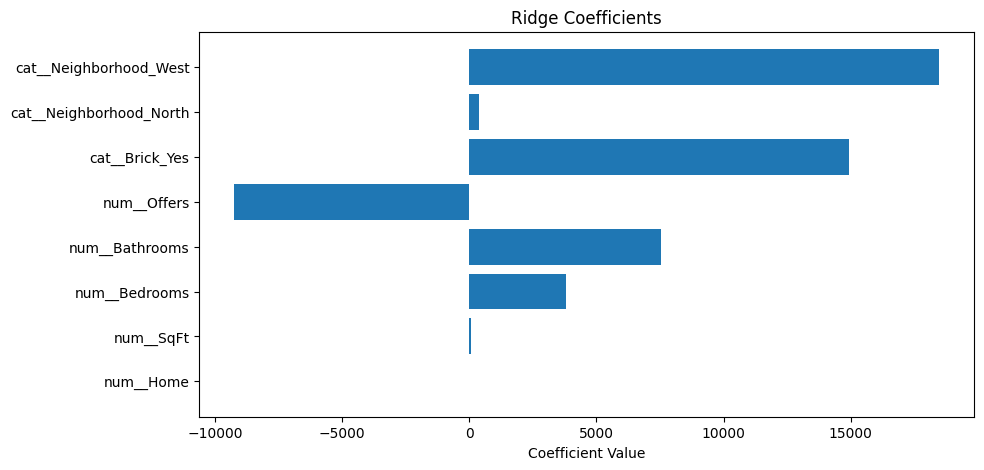

In [70]:
feature_names = model.named_steps["preprocess"].get_feature_names_out()

coeffs = model.named_steps["ridge"].coef_

plt.figure(figsize=(10,5))
plt.barh(feature_names, coeffs)
plt.xlabel("Coefficient Value")
plt.title("Ridge Coefficients")
plt.show()